## H24081163 陳詠翰 H24081341 耿皓畇 B14081027 劉恩兆

### 這份檔案只有 Problem 2、5、6的程式碼

In [1]:
import numpy as np
import pandas as pd
import category_encoders as ce
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import PowerTransformer ,StandardScaler ,LabelEncoder ,MinMaxScaler ,KBinsDiscretizer,QuantileTransformer
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
import re
import scipy.io

from imblearn.over_sampling import BorderlineSMOTE,SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from sklearn.metrics import f1_score,accuracy_score

from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import CondensedNearestNeighbour

C:\Users\user\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\user\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\user\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\user\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\user\anaconda3\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\user\anaconda3\lib\site-packages\dask\dat

## Income

In [2]:
income=pd.read_csv('C:/Homework/巨量資料/HW5/income_evaluation.csv')
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

income.columns = col_names

income['income'].replace(to_replace=' <=50K', value=0, inplace=True)
income['income'].replace(to_replace=' >50K',  value=1, inplace=True)

income['workclass'].replace(' ?', np.NaN, inplace=True)
income['native_country'].replace(' ?', np.NaN, inplace=True)
income['occupation'].replace(' ?', np.NaN, inplace=True)


income['workclass'].fillna(income['workclass'].mode()[0], inplace=True)
income['occupation'].fillna(income['occupation'].mode()[0], inplace=True)
income['native_country'].fillna(income['native_country'].mode()[0], inplace=True)

In [3]:
income = income[income.native_country != ' Holand-Netherlands']
income.index=range(len(income))

In [4]:
income.rename(columns={"income": "y"},inplace = True)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: ylabel='Density'>

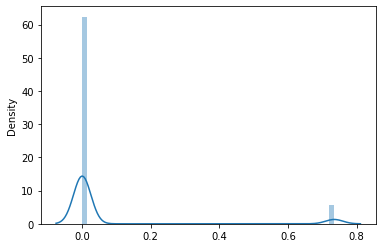

In [5]:
sns.distplot(stats.yeojohnson(income.capital_gain)[0])

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='capital_gain', ylabel='Density'>

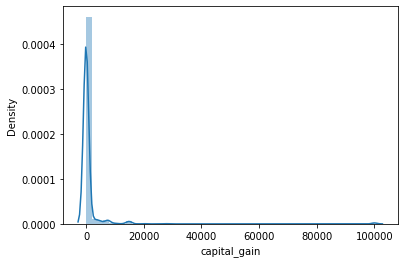

In [6]:
sns.distplot(income.capital_gain)

## Arrhythmia

In [7]:
arrhythmia = scipy.io.loadmat('C:/Homework/巨量資料/HW5/arrhythmia.mat')

In [8]:
arrhythmia_X=pd.DataFrame(arrhythmia['X'])
arrhythmia_X
arrhythmia_y=pd.DataFrame(arrhythmia['y'])
arrhythmia_y
arrhythmia_y.rename(columns={0: "y"},inplace = True)

frames=[arrhythmia_X,arrhythmia_y]
arrhythmia=pd.concat(frames,axis=1)

In [9]:
arrhythmia

,0,1,2,3,4,5,6,7,8,9,...,265,266,267,268,269,270,271,272,273,y
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,1
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53.0,1.0,160.0,70.0,80.0,199.0,382.0,154.0,117.0,-37.0,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,0
448,37.0,0.0,190.0,85.0,100.0,137.0,361.0,201.0,73.0,86.0,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,0
449,36.0,0.0,166.0,68.0,108.0,176.0,365.0,194.0,116.0,-85.0,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,0
450,32.0,1.0,155.0,55.0,93.0,106.0,386.0,218.0,63.0,54.0,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,0


In [10]:
arrhythmia_X

,0,1,2,3,4,5,6,7,8,9,...,264,265,266,267,268,269,270,271,272,273
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53.0,1.0,160.0,70.0,80.0,199.0,382.0,154.0,117.0,-37.0,...,0.0,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5
448,37.0,0.0,190.0,85.0,100.0,137.0,361.0,201.0,73.0,86.0,...,-0.5,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4
449,36.0,0.0,166.0,68.0,108.0,176.0,365.0,194.0,116.0,-85.0,...,1.2,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2
450,32.0,1.0,155.0,55.0,93.0,106.0,386.0,218.0,63.0,54.0,...,0.2,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6


## Bank

In [11]:
bank=pd.read_csv('C:/Homework/巨量資料/HW5/bank/bank-full.csv',sep=';')
bank['y'].replace(['no','yes'],[0,1],inplace = True)

In [12]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


## HTRU_2

In [13]:
htru2=pd.read_csv('C:/Homework/巨量資料/HW5/HTRU2/HTRU_2.csv',header=None)
htru2.rename(columns={8: "y"},inplace = True)

In [14]:
htru2

,0,1,2,3,4,5,6,7,y
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


## Blastchar

In [15]:
blastchar=pd.read_csv('C:/Homework/巨量資料/HW1_H24081341/WA_Fn-UseC_-Telco-Customer-Churn.csv')
blastchar=blastchar.drop('customerID',axis=1)

blastchar.rename(columns={"Churn": "y"},inplace = True)
blastchar['y'].replace(to_replace='Yes', value=1, inplace=True)
blastchar['y'].replace(to_replace='No',  value=0, inplace=True)

In [16]:
blastchar = blastchar[blastchar['TotalCharges']!=' ']

blastchar[['TotalCharges']]=blastchar[['TotalCharges']].apply(pd.to_numeric)

In [17]:
blastchar.index=range(len(blastchar))

## Shoppers

In [18]:
shoppers=pd.read_csv('C:/Homework/巨量資料/HW5/online_shoppers_intention.csv')
shoppers.rename(columns={'Revenue': "y"},inplace = True)
shoppers['y'].replace([False,True],[0,1],inplace = True)
shoppers['Weekend'].replace([False,True],[0,1],inplace = True)

In [19]:
shoppers

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,y
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,0,0


## QSAR Bio

In [20]:
qsar=pd.read_csv('C:/Homework/巨量資料/HW5/biodeg.csv',sep=';',header=None)
qsar.rename(columns={41: "y"},inplace = True)
qsar['y'].replace(["NRB","RB"],[0,1],inplace = True)

In [21]:
qsar

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,y
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,...,0,0,0,2.949,1.591,0,7.253,0,0,1
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,3.315,1.967,0,7.257,0,0,1
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,1,3.076,2.417,0,7.601,0,0,1
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,...,0,0,1,3.046,5.000,0,6.690,0,0,1
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,...,0,0,0,3.351,2.405,0,8.003,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,5.431,2.8955,0,0,0,2,0,32.1,4,1,...,0,6,1,3.573,2.242,1,8.088,0,0,0
1051,5.287,3.3732,0,0,9,0,0,35.3,0,9,...,0,3,0,3.787,3.083,3,9.278,0,0,0
1052,4.869,1.7670,0,1,9,0,5,44.4,0,4,...,4,13,0,3.848,2.576,5,9.537,1,0,0
1053,5.158,1.6914,2,0,36,0,9,56.1,0,0,...,1,16,0,5.808,2.055,8,11.055,0,1,0


## shrutime

In [22]:
shrutime=pd.read_csv('C:/Homework/巨量資料/HW5/Churn_Modelling.csv')
shrutime.rename(columns={"Exited": "y"},inplace = True)
shrutime.drop(['RowNumber','CustomerId','Surname'], axis=1,inplace=True)

In [23]:
shrutime

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,y
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## spambase

In [24]:
with open("C:/Homework/巨量資料/HW5/spambase/spambase.data", "r", encoding='utf-8-sig') as f:
    spambase = f.read()
spambase=spambase.split('\n')

spambase = [i.split(',') for i in spambase] 

In [25]:
spambase=pd.DataFrame(spambase)
spambase=spambase.iloc[0:4601]
spambase.rename(columns={57: "y"},inplace = True)
spambase

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,y
0,0,0.64,0.64,0,0.32,0,0,0,0,0,...,0,0,0,0.778,0,0,3.756,61,278,1
1,0.21,0.28,0.5,0,0.14,0.28,0.21,0.07,0,0.94,...,0,0.132,0,0.372,0.18,0.048,5.114,101,1028,1
2,0.06,0,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0,0.276,0.184,0.01,9.821,485,2259,1
3,0,0,0,0,0.63,0,0.31,0.63,0.31,0.63,...,0,0.137,0,0.137,0,0,3.537,40,191,1
4,0,0,0,0,0.63,0,0.31,0.63,0.31,0.63,...,0,0.135,0,0.135,0,0,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0,0.62,0,0,0.31,0,0,0,0,...,0,0.232,0,0,0,0,1.142,3,88,0
4597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.353,0,0,1.555,4,14,0
4598,0.3,0,0.3,0,0,0,0,0,0,0,...,0.102,0.718,0,0,0,0,1.404,6,118,0
4599,0.96,0,0,0,0.32,0,0,0,0,0,...,0,0.057,0,0,0,0,1.147,5,78,0


## default

In [26]:
default=pd.read_csv('C:/Homework/巨量資料/HW5/UCI_Credit_Card.csv')
default.rename(columns={"default.payment.next.month": "y"},inplace = True)
default.drop(['ID'], axis=1,inplace=True)

In [27]:
default = default[default['PAY_2']!=8]
default = default[default['PAY_3']!=8]
default = default[default['PAY_4']!=8]
default = default[default['PAY_5']!=8]
default = default[default['PAY_6']!=8]

default.index=range(len(default))

# 定義每個資料集的連續型變數和類別型變數

In [28]:
income_con_col = []
income_cat_col = []
arrhy_con_col = []
arrhy_cat_col = []
bank_cat_col = ['job', 'marital' ,'contact','month','poutcome','default','housing','loan','education']
bank_con_col = list(bank.drop(bank_cat_col,axis=1).columns)
htru_con_col = []
htru_cat_col = []
blast_con_col = []
blast_cat_col = []
shopper_con_col = []
shopper_cat_col = []
bio_con_col = []
bio_cat_col = []
shrutime_con_col = []
shrutime_cat_col = []
spam_con_col = []
spam_cat_col = []
default_cat_col = ['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
default_con_col = list(default.drop(default_cat_col,axis=1).columns)

In [29]:
def con_cat(dataframe,con_list,cat_list):
    for i in dataframe.columns:
        if (i !='y'):
            if (type(dataframe[i][0])==str):   
                cat_list.append(i)
            else:
                con_list.append(i)

In [30]:
df_list = [income,arrhythmia,htru2,blastchar,shoppers,shrutime]
df_con_list = [income_con_col,arrhy_con_col,htru_con_col,blast_con_col,shopper_con_col,shrutime_con_col]
df_cat_list = [income_cat_col,arrhy_cat_col,htru_cat_col,blast_cat_col,shopper_cat_col,shrutime_cat_col]
for i in range(len(df_list)):
    con_cat(df_list[i],df_con_list[i],df_cat_list[i])

In [31]:
bank_con_col.remove('y')
default_con_col.remove('y')

# Problem2

In [32]:
def one_hot(df,con,cat,onehot=True):
    skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
    X=df.drop(['y'],axis=1)
    y=df['y']
    f1=0
    X_OH=X.copy()
    X_LB=X.copy()
    OH=ce.OneHotEncoder(cols=cat)
    X_OH=OH.fit_transform(X_OH)
    for j in cat:
        le=LabelEncoder()
        X_LB[j]=le.fit_transform(X_LB[j])
    
    for train_index, test_index in skf.split(X, y):
        train_y = y.loc[train_index]
        test_y=y.loc[test_index]
        
        if onehot==True:
            scaled_train_X = X_OH.loc[train_index,:]
            scaled_test_X = X_OH.loc[test_index,:]
        if onehot==False:
            scaled_train_X = X_LB.loc[train_index,:]
            scaled_test_X = X_LB.loc[test_index,:]            

      
        #scale the numerical variables
        stand_train = scaled_train_X[con]
        stand_test = scaled_test_X[con]
        sc=StandardScaler()
        stand_train = sc.fit_transform(stand_train.values)
        stand_test = sc.transform(stand_test.values)
        

        scaled_test_X[con]=stand_test
        scaled_train_X[con]=stand_train

        rf = RandomForestClassifier(random_state=0)
        rf.fit(scaled_train_X,train_y)
        pred=rf.predict(scaled_test_X)
        pred_auc=rf.predict(scaled_test_X)
        
        f1+=f1_score(test_y,pred)
        
    return round(f1/5,4)

In [33]:
import warnings
warnings.filterwarnings("ignore")

In [34]:
one_hot(income,income_con_col,income_cat_col,onehot=True)

0.6737

In [35]:
one_hot(income,income_con_col,income_cat_col,onehot=False)

0.6781

In [36]:
one_hot(bank,bank_con_col,bank_cat_col,onehot=True)

0.4955

In [37]:
one_hot(bank,bank_con_col,bank_cat_col,onehot=False)

0.5118

In [38]:
one_hot(blastchar,blast_con_col,blast_cat_col,onehot=True)

0.5487

In [39]:
one_hot(blastchar,blast_con_col,blast_cat_col,onehot=False)

0.5485

In [40]:
one_hot(shoppers,shopper_con_col,shopper_cat_col,onehot=True)

0.6493

In [41]:
one_hot(shoppers,shopper_con_col,shopper_cat_col,onehot=False)

0.6458

In [42]:
one_hot(shrutime,shrutime_con_col,shrutime_cat_col,onehot=False)

0.5666

In [43]:
one_hot(shrutime,shrutime_con_col,shrutime_cat_col,onehot=True)

0.5721

In [44]:
one_hot(default,default_con_col,default_cat_col,onehot=True)

0.4722

In [45]:
one_hot(default,default_con_col,default_cat_col,onehot=False)

0.4718

# Problem 5

In [46]:
def continuous(train,test,con,method=0):
    scaled_train = train.copy()
    scaled_test = test.copy()
    stand_train = scaled_train[con]
    stand_test = scaled_test[con]
    #Normalization
    if method==1:
        MM = MinMaxScaler()
        stand_train = MM.fit_transform(stand_train.values)
        stand_test = MM.transform(stand_test.values)
    #Box-cox
    if method==2:
        pt = PowerTransformer()
        stand_train = pt.fit_transform(stand_train.values)
        stand_test = pt.transform(stand_test.values)
    #Equal-width binning
    if method==3:
        est = KBinsDiscretizer(n_bins=10, encode='ordinal',strategy='uniform')
        stand_train=est.fit_transform(stand_train.values)
        stand_test =est.transform(stand_test.values)
    #Equal-frequency binning
    if method==4:
        est = KBinsDiscretizer(n_bins=10, encode='ordinal',strategy='quantile')
        stand_train=est.fit_transform(stand_train.values)
        stand_test =est.transform(stand_test.values)
    #Rank conversion 
    if method==5:
        rk = QuantileTransformer(n_quantiles=100, random_state=0, output_distribution='normal')
        stand_train=rk.fit_transform(stand_train.values)
        stand_test =rk.transform(stand_test.values)
    #Standardization
    if method==0:
        sc=StandardScaler()
        stand_train = sc.fit_transform(stand_train.values)
        stand_test = sc.transform(stand_test.values)
    
    scaled_test[con]=stand_test
    scaled_train[con]=stand_train

    return scaled_train ,scaled_test

In [47]:
def problem_5(df,con,cat):
    skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
    X=df.drop(['y'],axis=1)
    y=df['y']
    
    #One-Hot encoder and Label encoder
    X_OH=X.copy()
    X_LB=X.copy()
    OH=ce.OneHotEncoder(cols=cat)
    X_OH=OH.fit_transform(X_OH)
    for j in cat:
        le=LabelEncoder()
        X_LB[j]=le.fit_transform(X_LB[j])

    
    f1_OH={'Standard_Scaler':0,'Normalization':0,'Box-cox':0,'Equal-width binning':0,'Equal-freq binning':0,
              'Rank':0}
    f1_LB={'Standard_Scaler':0,'Normalization':0,'Box-cox':0,'Equal-width binning':0,'Equal-freq binning':0,
              'Rank':0}
    f1_LOO={'Standard_Scaler':0,'Normalization':0,'Box-cox':0,'Equal-width binning':0,'Equal-freq binning':0,
              'Rank':0}
    con_list=['Standard_Scaler','Normalization','Box-cox','Equal-width binning','Equal-freq binning','Rank']
    for train_index, test_index in skf.split(X, y):
        train_X = X.loc[train_index,:]
        train_y = y.loc[train_index]
        test_X=X.loc[test_index,:]
        test_y=y.loc[test_index]
        
        
        

        for i in range(6):
            scaled_train_X = X_OH.loc[train_index,:]
            scaled_test_X = X_OH.loc[test_index,:]

            scaled_train_X,scaled_test_X=continuous(scaled_train_X,scaled_test_X,con,method=i)
            lgbm = lgb.LGBMClassifier(random_state=0)
            lgbm.fit(scaled_train_X,train_y)
            pred=lgbm.predict(scaled_test_X)
            f1_OH[con_list[i]]+=f1_score(test_y,pred)

            
        for i in range(6):
            scaled_train_X = X_LB.loc[train_index,:]
            scaled_test_X = X_LB.loc[test_index,:]

            scaled_train_X,scaled_test_X=continuous(scaled_train_X,scaled_test_X,con,method=i)
            lgbm = lgb.LGBMClassifier(random_state=0)
            lgbm.fit(scaled_train_X,train_y)
            pred=lgbm.predict(scaled_test_X)
            f1_LB[con_list[i]]+=f1_score(test_y,pred)

      

        for i in range(6):
            scaled_train_X = train_X.copy()
            scaled_test_X = test_X.copy()
            LOO=ce.LeaveOneOutEncoder(cols=cat,sigma=0.05,return_df=True)
            scaled_train_X,scaled_test_X=continuous(scaled_train_X,scaled_test_X,con,method=i)

            scaled_train_X=LOO.fit_transform(scaled_train_X,train_y)
            scaled_test_X=LOO.transform(scaled_test_X)
            lgbm = lgb.LGBMClassifier(random_state=0)
            lgbm.fit(scaled_train_X,train_y)
            pred=lgbm.predict(scaled_test_X)
            f1_LOO[con_list[i]]+=f1_score(test_y,pred)

    for i in range(6):
        print('One-Hot +',con_list[i],'f1 score = ',round(f1_OH[con_list[i]]/5,4))
        print('Label Encoder +',con_list[i],'f1 score = ',round(f1_LB[con_list[i]]/5,4))
        print('LOO +',con_list[i],'f1 score = ',round(f1_LOO[con_list[i]]/5,4))
        

In [48]:
problem_5(income,income_con_col,income_cat_col)

One-Hot + Standard_Scaler f1 score =  0.7145
Label Encoder + Standard_Scaler f1 score =  0.7159
LOO + Standard_Scaler f1 score =  0.7107
One-Hot + Normalization f1 score =  0.7134
Label Encoder + Normalization f1 score =  0.7149
LOO + Normalization f1 score =  0.7121
One-Hot + Box-cox f1 score =  0.7158
Label Encoder + Box-cox f1 score =  0.7163
LOO + Box-cox f1 score =  0.7123
One-Hot + Equal-width binning f1 score =  0.6746
Label Encoder + Equal-width binning f1 score =  0.6717
LOO + Equal-width binning f1 score =  0.6665
One-Hot + Equal-freq binning f1 score =  0.6485
Label Encoder + Equal-freq binning f1 score =  0.646
LOO + Equal-freq binning f1 score =  0.6425
One-Hot + Rank f1 score =  0.7165
Label Encoder + Rank f1 score =  0.7151
LOO + Rank f1 score =  0.7114


In [49]:
problem_5(bank,bank_con_col,bank_cat_col)

One-Hot + Standard_Scaler f1 score =  0.5651
Label Encoder + Standard_Scaler f1 score =  0.554
LOO + Standard_Scaler f1 score =  0.5531
One-Hot + Normalization f1 score =  0.5615
Label Encoder + Normalization f1 score =  0.5492
LOO + Normalization f1 score =  0.5528
One-Hot + Box-cox f1 score =  0.5657
Label Encoder + Box-cox f1 score =  0.5498
LOO + Box-cox f1 score =  0.5422
One-Hot + Equal-width binning f1 score =  0.4808
Label Encoder + Equal-width binning f1 score =  0.4781
LOO + Equal-width binning f1 score =  0.4594
One-Hot + Equal-freq binning f1 score =  0.5136
Label Encoder + Equal-freq binning f1 score =  0.5033
LOO + Equal-freq binning f1 score =  0.4843
One-Hot + Rank f1 score =  0.5615
Label Encoder + Rank f1 score =  0.551
LOO + Rank f1 score =  0.5484


In [50]:
problem_5(blastchar,blast_con_col,blast_cat_col)

One-Hot + Standard_Scaler f1 score =  0.572
Label Encoder + Standard_Scaler f1 score =  0.5696
LOO + Standard_Scaler f1 score =  0.5928
One-Hot + Normalization f1 score =  0.5835
Label Encoder + Normalization f1 score =  0.573
LOO + Normalization f1 score =  0.5965
One-Hot + Box-cox f1 score =  0.5751
Label Encoder + Box-cox f1 score =  0.5677
LOO + Box-cox f1 score =  0.5855
One-Hot + Equal-width binning f1 score =  0.5871
Label Encoder + Equal-width binning f1 score =  0.5778
LOO + Equal-width binning f1 score =  0.5888
One-Hot + Equal-freq binning f1 score =  0.5692
Label Encoder + Equal-freq binning f1 score =  0.5726
LOO + Equal-freq binning f1 score =  0.5889
One-Hot + Rank f1 score =  0.575
Label Encoder + Rank f1 score =  0.5759
LOO + Rank f1 score =  0.5899


In [51]:
problem_5(shoppers,shopper_con_col,shopper_cat_col)

One-Hot + Standard_Scaler f1 score =  0.6561
Label Encoder + Standard_Scaler f1 score =  0.6538
LOO + Standard_Scaler f1 score =  0.6572
One-Hot + Normalization f1 score =  0.6491
Label Encoder + Normalization f1 score =  0.6507
LOO + Normalization f1 score =  0.6571
One-Hot + Box-cox f1 score =  0.6496
Label Encoder + Box-cox f1 score =  0.6529
LOO + Box-cox f1 score =  0.6549
One-Hot + Equal-width binning f1 score =  0.4325
Label Encoder + Equal-width binning f1 score =  0.427
LOO + Equal-width binning f1 score =  0.4378
One-Hot + Equal-freq binning f1 score =  0.6546
Label Encoder + Equal-freq binning f1 score =  0.6521
LOO + Equal-freq binning f1 score =  0.6454
One-Hot + Rank f1 score =  0.6542
Label Encoder + Rank f1 score =  0.6516
LOO + Rank f1 score =  0.6583


In [52]:
problem_5(shrutime,shrutime_con_col,shrutime_cat_col)

One-Hot + Standard_Scaler f1 score =  0.5965
Label Encoder + Standard_Scaler f1 score =  0.5907
LOO + Standard_Scaler f1 score =  0.6015
One-Hot + Normalization f1 score =  0.5936
Label Encoder + Normalization f1 score =  0.5899
LOO + Normalization f1 score =  0.5865
One-Hot + Box-cox f1 score =  0.5913
Label Encoder + Box-cox f1 score =  0.598
LOO + Box-cox f1 score =  0.5913
One-Hot + Equal-width binning f1 score =  0.5806
Label Encoder + Equal-width binning f1 score =  0.5831
LOO + Equal-width binning f1 score =  0.5809
One-Hot + Equal-freq binning f1 score =  0.4566
Label Encoder + Equal-freq binning f1 score =  0.4396
LOO + Equal-freq binning f1 score =  0.4471
One-Hot + Rank f1 score =  0.5996
Label Encoder + Rank f1 score =  0.5847
LOO + Rank f1 score =  0.5932


In [53]:
problem_5(default,default_con_col,default_cat_col)

One-Hot + Standard_Scaler f1 score =  0.4822
Label Encoder + Standard_Scaler f1 score =  0.4808
LOO + Standard_Scaler f1 score =  0.4829
One-Hot + Normalization f1 score =  0.4806
Label Encoder + Normalization f1 score =  0.4795
LOO + Normalization f1 score =  0.4778
One-Hot + Box-cox f1 score =  0.4772
Label Encoder + Box-cox f1 score =  0.48
LOO + Box-cox f1 score =  0.4797
One-Hot + Equal-width binning f1 score =  0.4734
Label Encoder + Equal-width binning f1 score =  0.4741
LOO + Equal-width binning f1 score =  0.473
One-Hot + Equal-freq binning f1 score =  0.4774
Label Encoder + Equal-freq binning f1 score =  0.478
LOO + Equal-freq binning f1 score =  0.4766
One-Hot + Rank f1 score =  0.478
Label Encoder + Rank f1 score =  0.4783
LOO + Rank f1 score =  0.4816


# Problem6

In [54]:
def problem_6(df,con,cat):
    skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
    X=df.drop(['y'],axis=1)
    y=df['y']
    
    X_OH=X.copy()
    X_LB=X.copy()
    OH=ce.OneHotEncoder(cols=cat)
    X_OH=OH.fit_transform(X_OH)
    for j in cat:
        le=LabelEncoder()
        X_LB[j]=le.fit_transform(X_LB[j])
    
    f1_OH=0
    f1_LB=0
    f1_TE=0
    
    f1_OH_log=0
    f1_LB_log=0
    f1_TE_log=0
    
    for train_index, test_index in skf.split(X, y):
        train_X = X.loc[train_index,:]
        train_y = y.loc[train_index]
        test_X=X.loc[test_index,:]
        test_y=y.loc[test_index]
        
        #One-Hot Encoding
        scaled_train_OH = X_OH.loc[train_index,:]
        scaled_test_OH = X_OH.loc[test_index,:]

        stand_train = scaled_train_OH[con]
        stand_test = scaled_test_OH[con]
        sc=StandardScaler()
        stand_train = sc.fit_transform(stand_train.values)
        stand_test = sc.transform(stand_test.values)
        scaled_test_OH[con]=stand_test
        scaled_train_OH[con]=stand_train
        
        lgbm = lgb.LGBMClassifier(random_state=0)
        lgbm.fit(scaled_train_OH,train_y)
        pred=lgbm.predict(scaled_test_OH)
        f1_OH+=f1_score(test_y,pred)
        
        lr=LogisticRegression(random_state=0).fit(scaled_train_OH,train_y)
        lr.fit(scaled_train_OH,train_y)
        pred=lr.predict(scaled_test_OH)
        f1_OH_log+=f1_score(test_y,pred)
        
        #Label Encoding
        scaled_train_LB = X_LB.loc[train_index,:]
        scaled_test_LB = X_LB.loc[test_index,:]

        stand_train = scaled_train_LB[con]
        stand_test = scaled_test_LB[con]
        sc=StandardScaler()
        stand_train = sc.fit_transform(stand_train.values)
        stand_test = sc.transform(stand_test.values)
        scaled_test_LB[con]=stand_test
        scaled_train_LB[con]=stand_train
        
        lgbm = lgb.LGBMClassifier(random_state=0)
        lgbm.fit(scaled_train_LB,train_y)
        pred=lgbm.predict(scaled_test_LB)
        f1_LB+=f1_score(test_y,pred)
        lr=LogisticRegression(random_state=0).fit(scaled_train_LB,train_y)
        lr.fit(scaled_train_LB,train_y)
        pred=lr.predict(scaled_test_LB)
        f1_LB_log+=f1_score(test_y,pred)
        

        #Target encoder
        scaled_train_TE = train_X.copy()
        scaled_test_TE = test_X.copy()
        TE=ce.TargetEncoder(cols=cat)
        scaled_train_TE=TE.fit_transform(scaled_train_TE,train_y)
        scaled_test_TE=TE.transform(scaled_test_TE)

        lgbm = lgb.LGBMClassifier(random_state=0)
        lgbm.fit(scaled_train_TE,train_y)
        pred=lgbm.predict(scaled_test_TE)
        f1_TE+=f1_score(test_y,pred)
        
        lr=LogisticRegression(random_state=0).fit(scaled_train_TE,train_y)
        lr.fit(scaled_train_TE,train_y)
        pred=lr.predict(scaled_test_TE)
        
        f1_TE_log+=f1_score(test_y,pred)


    print('One-Hot with LGBM f1 score = ',round(f1_OH/5,4))
    print('Label Encoder with LGBM f1 score = ',round(f1_LB/5,4))
    print('Target Encoding with LGBM f1 score = ',round(f1_TE/5,4))
    print('One-Hot with LR f1 score = ',round(f1_OH_log/5,4))
    print('Label Encoder with LR f1 score = ',round(f1_LB_log/5,4))
    print('Target Encoding with LR f1 score = ',round(f1_TE_log/5,4))

In [55]:
problem_6(income,income_con_col,income_cat_col)

One-Hot with LGBM f1 score =  0.7145
Label Encoder with LGBM f1 score =  0.7159
Target Encoding with LGBM f1 score =  0.7133
One-Hot with LR f1 score =  0.6594
Label Encoder with LR f1 score =  0.557
Target Encoding with LR f1 score =  0.3847


In [56]:
problem_6(bank,bank_con_col,bank_cat_col)

One-Hot with LGBM f1 score =  0.5651
Label Encoder with LGBM f1 score =  0.554
Target Encoding with LGBM f1 score =  0.5592
One-Hot with LR f1 score =  0.4508
Label Encoder with LR f1 score =  0.3162
Target Encoding with LR f1 score =  0.2445


In [57]:
problem_6(blastchar,blast_con_col,blast_cat_col)

One-Hot with LGBM f1 score =  0.572
Label Encoder with LGBM f1 score =  0.5696
Target Encoding with LGBM f1 score =  0.5779
One-Hot with LR f1 score =  0.597
Label Encoder with LR f1 score =  0.5945
Target Encoding with LR f1 score =  0.5811


In [58]:
problem_6(shoppers,shopper_con_col,shopper_cat_col)

One-Hot with LGBM f1 score =  0.6561
Label Encoder with LGBM f1 score =  0.6538
Target Encoding with LGBM f1 score =  0.6518
One-Hot with LR f1 score =  0.5042
Label Encoder with LR f1 score =  0.4993
Target Encoding with LR f1 score =  0.4996


In [59]:
problem_6(shrutime,shrutime_con_col,shrutime_cat_col)

One-Hot with LGBM f1 score =  0.5965
Label Encoder with LGBM f1 score =  0.5907
Target Encoding with LGBM f1 score =  0.5881
One-Hot with LR f1 score =  0.3138
Label Encoder with LR f1 score =  0.2708
Target Encoding with LR f1 score =  0.0984


In [60]:
problem_6(default,default_con_col,default_cat_col)

One-Hot with LGBM f1 score =  0.4822
Label Encoder with LGBM f1 score =  0.4808
Target Encoding with LGBM f1 score =  0.4783
One-Hot with LR f1 score =  0.4682
Label Encoder with LR f1 score =  0.3657
Target Encoding with LR f1 score =  0.0006


In [61]:
for var in income_cat_col: 
    print(income[var].value_counts())

 Private             24531
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10501
 Some-college     7290
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical   

In [62]:
for var in bank_cat_col: 
    print(bank[var].value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


In [63]:
for var in blast_cat_col: 
    print(blastchar[var].value_counts())

Male      3549
Female    3483
Name: gender, dtype: int64
No     3639
Yes    3393
Name: Partner, dtype: int64
No     4933
Yes    2099
Name: Dependents, dtype: int64
Yes    6352
No      680
Name: PhoneService, dtype: int64
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64
No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64
No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64
No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV

In [64]:
for var in shopper_cat_col: 
    print(shoppers[var].value_counts())

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64


In [65]:
for var in default_cat_col: 
    print(default[var].value_counts())

2    18111
1    11883
Name: SEX, dtype: int64
2    14026
1    10584
3     4916
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
2    15960
1    13657
3      323
0       54
Name: MARRIAGE, dtype: int64
 0    14737
-1     5686
 1     3684
-2     2759
 2     2666
 3      321
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64
 0    15730
-1     6050
 2     3924
-2     3782
 3      325
 4       99
 1       28
 5       24
 7       20
 6       12
Name: PAY_2, dtype: int64
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       75
 7       25
 6       23
 5       21
 1        4
Name: PAY_3, dtype: int64
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       56
 5       35
 6        3
 1        2
Name: PAY_4, dtype: int64
 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       55
 5       16
 6        3
Name: PAY_5, dtype: int64
 0    16286
-1     5740
-2     4895
 2     2